In this Python Notebook we are going to impement experimental results for semi-clairvoyant scheduling in a single machine. More specifically every job comes with its test time and if and only if we have run its test we know its exact processing time.  

In [ ]:
#Every Job has Attributes 
# 1) Arrival Time
# 2) Size
# 3) Test size 
class Job:
  def __init__(self,arrival_time,size,test_size):
    self.arrival_time = arrival_time
    self.size = size
    self.test_size = test_size
    self.completiontime = 0 
  def __str__(self):
    return f'{self.__class__.__name__} arrives at time equal to {self.arrival_time} and has size of {self.size} and its test has size of {self.test_size}'
  def __repr__(self):
    return f'{self.__class__.__name__} arrives at time equal to {self.arrival_time} and has size of {self.size} and its test has size of {self.test_size}'

In [ ]:
import copy

In [ ]:
#creating the instance of the jobs with release time = 0 for every job
from numpy.random import seed
from numpy.random import rand
# seed random number generator
seed(17)
#set the number of jobs in variable n , ... the actual number is n+1
n = 100
#min job has size 1 unit and arbitary test
minjob = Job(0,1,10*rand())
#all jobs are stored in a list of jobs
joblist = list()
joblist.append(minjob)
# generate random numbers between 0-1
for i in range(n):
  newJob = Job(0,1+10*rand(),10*rand())
  joblist.append(newJob)

In [ ]:
def RoundRobin (jobList,clear=True,inT = 0, inObj = 0):

  #T is a time variable to compute Ci
  T = inT #when we start time t = 0 
  
  joblist = copy.deepcopy(jobList) #create a copy of job list

  obj = inObj #objective function is the Sum of Completion Times

  if(clear):
    for job in joblist:
      job.completiontime = 0  #set all completion times to 0 

  #in RR for every time t every job has been processed for equal amount of time 

  joblist.sort(key=lambda x: x.size, reverse=True) #reverse=True for pop()

  while(joblist):

    minjob = joblist.pop() #min job finishes first
    
    #take its size and add it to every's job Ci
    t = minjob.size
    
    T += (len(joblist) + 1)*t

    minjob.completiontime = T
    for job in joblist:
      job.size -= t
    
    obj += T
  return obj




In the following cells we are going to check the Round Robin evaluation for sum of completion times. We will construct 2 instances. One where all jobs are equal with size one and the other where job i has size propotional to its size. We remind that $RR_{obj} = \sum_{i=1}^{n}C_{i} =  2\sum_{i=1}^{n}(n-i)x_{i} + \sum_{i=1}^{n}x_{i}$
In case of $x_{i} = 1 \text{ ,}∀i \in [n]$, we know that all jobs finish togother at time $t = N$ so $RR_{obj} = \sum_{i=1}^{n}C_{i} = n^{2}$. On the other hand, when $x_{i} = i \text{ ,}∀i \in [n]$, we derive that $RR_{obj} = 2\sum_{i=1}^{n}ni - 2\sum_{i=1}^{n}i^{2} + \sum_{i=1}^{n}i = 2n\frac{n(n+1)}{2} - 2\frac{n(n+1)(2n+1)}{6}+\frac{n(n+1)}{2} = n^{2}(n+1) - n(n+1)\frac{(2n+1)}{6} + \frac{n(n+1)}{2} = n(n+1)\{n - \frac{(2n+1)}{3} + \frac{1}{2}\} = n(n+1)\frac{2n+1}{6}$. 

In [ ]:
#in this cell we are going to test Round Robin function in the instances described above

#first we construct this instances

'''
Instance 1 
'''

n = 100
#min job has size 1 unit and arbitary test
minjob = Job(0,1,10*rand())
#all jobs are stored in a list of jobs
testRR1 = list()
testRR1.append(minjob)
# generate random numbers between 0-1
for i in range(n-1):
  newJob = Job(0,1,10*rand())
  testRR1.append(newJob)

'''
Instance 2
'''

n = 100
#min job has size 1 unit and arbitary test
minjob = Job(0,1,10*rand())
#all jobs are stored in a list of jobs
testRR2 = list()
testRR2.append(minjob)
# generate random numbers between 0-1
for i in range(2,n+1):
  newJob = Job(0,i,10*rand())
  testRR2.append(newJob)


'''
Now, we call Round Robin to check the objectives
'''

print(RoundRobin(testRR1))

print(n**2)

print(RoundRobin(testRR2))

print(n*(n+1)*(2*n+1)/6)

10000
10000
338350
338350.0


In [ ]:
def SPT (jobList,clear=True,inT = 0,inObj = 0):

  #T is a time variable to compute Ci
  T = inT #when we start time t = 0 
  
  joblist = copy.deepcopy(jobList) #create a copy of job list

  obj = inObj #objective function is the Sum of Completion Times

  if(clear):
    for job in joblist:
      job.completiontime = 0  #set all completion times to 0 

  #in SPT for every time t the smallest job has been processed only
  #so when it finishes no other job's size is decreased 

  joblist.sort(key=lambda x: x.size, reverse=True) #reverse=True for pop()

  while(joblist):

    minjob = joblist.pop() #min job finishes first
    
    #take its size and add it to every's job Ci
    t = minjob.size
    
    T += t

    minjob.completiontime = T
    
    obj += T
  return obj

Shortest Remaining Processing Time objective function is $\sum_{i=1}^{n}(n-i+1)x_{i}$. So, for $x_{i} = 1 \text{ ,}∀i \in [n]$ we have that $\sum_{i=1}^{n}C_{i} = \frac{n(n+1)}{2}$ and for $x_{i} = i \text{ ,}∀i \in [n]$ we derive that $\sum_{i=1}^{n}C_{i} = \frac{n(n+1)(n+2)}{6}$.

In [ ]:
#in this cell we are going to test SPT function in the instances described above

#first we construct this instances

'''
Instance 1 
'''

n = 100
#min job has size 1 unit and arbitary test
minjob = Job(0,1,10*rand())
#all jobs are stored in a list of jobs
testSPT1 = list()
testSPT1.append(minjob)
# generate random numbers between 0-1
for i in range(n-1):
  newJob = Job(0,1,10*rand())
  testSPT1.append(newJob)

'''
Instance 2
'''

n = 100
#min job has size 1 unit and arbitary test
minjob = Job(0,1,10*rand())
#all jobs are stored in a list of jobs
testSPT2 = list()
testSPT2.append(minjob)
# generate random numbers between 0-1
for i in range(2,n+1):
  newJob = Job(0,i,10*rand())
  testSPT2.append(newJob)


'''
Now, we call SPT to check the objectives
'''

print(SPT(testSPT1))

print(n*(n+1)/2)

print(SPT(testSPT2))

print(n*(n+1)*(n+2)/6)


5050
5050.0
171700
171700.0


In [ ]:
#in this function we simulate Round Robin execution until time T
def RRtilT (jobList,T,clear=True,to_copy=True):
  
  #t is a time variable to compute Ci
  t = 0 #when we start time t = 0 

  #we run RR until t <=T
  if (to_copy):
    joblist = copy.deepcopy(jobList) #create a copy of job list
  else :
    joblist = jobList[:]

  obj = 0 #objective function is the Sum of Completion Times

  if(clear):
    for job in joblist:
      job.completiontime = 0  #set all completion times to 0 

  #in RR for every time t every job has been processed for equal amount of time 

  joblist.sort(key=lambda x: x.size, reverse=True) #reverse=True for pop()


  while(joblist and t< T):

    #print("t = {t} and T = {T}".format(t=t,T=T))
    #check if T is enough time for the min job to have finished

    if (joblist[-1].size * len(joblist) <= T):
      #here T suffices for the min job to have been finished 

      t += joblist[-1].size * len(joblist) #update time variable

      T -= t # decrease available time 

      #print("Now, t = {t} and T = {T}".format(t=t,T=T))

      minjob = joblist.pop() #pop min job 

    
      #take its size and add it to every's job Ci
      minsize = minjob.size
    

      minjob.completiontime = t
      for job in joblist:
        job.size -= minsize
    
      obj += t
    else :
      #print("been here")
      #here T does not suffice for the smallest job to have been finished 
      #so we decrease every job's size by T/(len(list))
      workload = T/len(joblist)

      for job in joblist:
        job.size -= workload

      #we set T=0
      t += T
      T-= t
      #print("Now, t = {t} and T = {T}".format(t=t,T=T)) 
    #print(joblist and t< T)
  #print("In the end, t = {t} and T = {T}".format(t=t,T=T)) 
  return (obj,joblist)

To test RRtilT function we will create two instances. One where all jobs are equal and none of the jobs will finish and the other where all jobs are equal too but in the end all jobs will have finished.In the first we should take obj equal to zero and in the second equal to RR's objective. 

In [ ]:
#in this cell we are going to test Round Robin until T function in the instances described above

#first we construct this instances

'''
Instance 1 
'''

n = 100
#min job has size 1 unit and arbitary test
minjob = Job(0,1,10*rand())
#all jobs are stored in a list of jobs
testRRT1 = list()
testRRT1.append(minjob)
# generate random numbers between 0-1
for i in range(n-1):
  newJob = Job(0,1,10*rand())
  testRRT1.append(newJob)

'''
Instance 2
'''

n = 100
#min job has size 1 unit and arbitary test
minjob = Job(0,1,10*rand())
#all jobs are stored in a list of jobs
testRRT2 = list()
testRRT2.append(minjob)
# generate random numbers between 0-1
for i in range(n-1):
  newJob = Job(0,1,10*rand())
  testRRT2.append(newJob)


'''
Now, we call Round Robin to check the objectives
'''

result1 = RRtilT(testRRT1,1)

print(result1[0],len(result1[1]))

result2 = RRtilT(testRRT2,n)

print(result2[0],len(result2[1]))




0 100
100 99


Now we are ready to combine Round Robin with SPT. More specifically, we run Round Robin for jobs sizes at $\lambda$ rate and tests in SPT at 1 - $\lambda$ rate. When, all tests have finished we run SPT. 

In [ ]:
def RR_SPT (jobList, rate,clear= True):
  
  joblist = copy.deepcopy(jobList)

  if (not (0<=rate<=1)):
    print("Give valid rate.")
    return
  
  if(clear):
    for job in joblist:
      job.completiontime = 0  #set all completion times to 0 

  #Run RR until time = sum t_i

  sum_t_i = sum(job.test_size for job in joblist)

  sum_t_i = sum_t_i/rate
  
  RRobj,joblist = RRtilT(joblist,sum_t_i,False)

  #now run SPT for the rest of the jobs

  obj = SPT(joblist,False,sum_t_i,RRobj/rate)
    
  return obj 

In [ ]:
#in this cell we are going to test Round Robin combined with SPT

#first we construct this instances

'''
Instance 1 
'''

n = 100
#min job has size 1 unit and arbitary test
minjob = Job(0,1,1)
#all jobs are stored in a list of jobs
testRRSPT1 = list()
testRRSPT1.append(minjob)
# generate random numbers between 0-1
for i in range(n-1):
  newJob = Job(0,1,1)
  testRRSPT1.append(newJob)

'''
Instance 2
'''

n = 100
#min job has size 1 unit and arbitary test
minjob = Job(0,1,(10*rand())/10)
#all jobs are stored in a list of jobs
testRRSPT2 = list()
testRRSPT2.append(minjob)
# generate random numbers between 0-1
for i in range(n-1):
  newJob = Job(0,10,(10*rand())/10)
  testRRSPT2.append(newJob)


'''
Now, we call Round Robin to check the objectives
'''

result1_combined = RR_SPT(testRRSPT1,1/2)

result1RR = RoundRobin(testRRSPT1)

result1SPT = SPT(testRRSPT1)

print(result1_combined,result1RR,result1SPT)


result2_combined = RR_SPT(testRRSPT2,1/2)

result2RR = RoundRobin(testRRSPT2)

result2SPT = SPT(testRRSPT2)


print(result2_combined,result2RR,result2SPT)


20000.0 10000 5050
54760.98836440231 98209 49600


In the following cells, we are going to plot for different values of the rate $\lambda$ the performance of SPT,RR and combined SPT&RR for different values of n samples. For each value of n we are going to run 100 times and take the mean value of the objectives for robusteness.

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
def plot (n,RR,SPT,RR_SPT,l_val):
  x = np.linspace(1, n-1, n-1)  # Sample data.

  # Note that even in the OO-style, we use `.pyplot.figure` to create the Figure.
  fig, ax = plt.subplots(figsize=(5, 2.7))
  ax.plot(x, np.array(SPT), label='SPT')  # Plot some data on the axes.
  ax.plot(x, np.array(RR), label='RR')  # Plot more data on the axes...
  ax.plot(x, np.array(RR_SPT), label='RR_SPT')  # ... and some more.
  ax.set_xlabel('x label')  # Add an x-label to the axes.
  ax.set_ylabel('y label')  # Add a y-label to the axes.
  ax.set_title("Lamda = {l}".format(l=l_val))  # Add a title to the axes.
  ax.legend();  # Add a legend.
  
  return ax

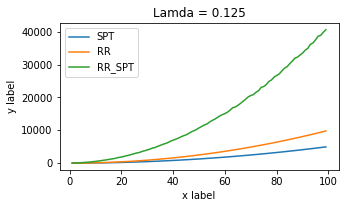

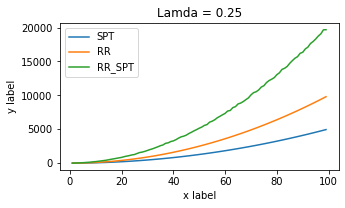

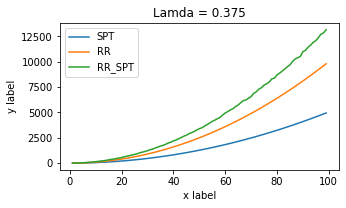

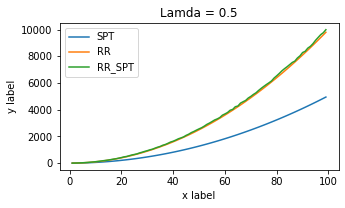

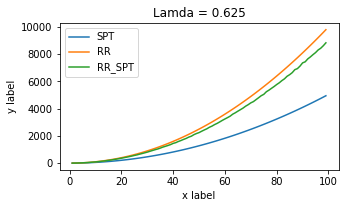

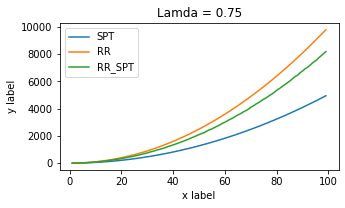

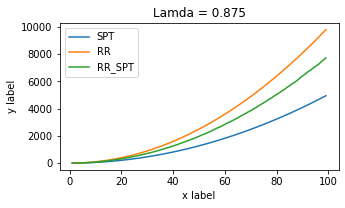

In [ ]:
lamda = [1/8,1/4,3/8,1/2,5/8,3/4,7/8]

for l in lamda :
  ###################
  RRl = []
  SPTl = []
  RR_SPTl = []
  ###################
  for n in range(1,100):
    RR_n = []
    SPT_n = []
    RR_SPT_n = []
    for i in range(1,101):
      #min job has size 1 unit and arbitary test
      minjob = Job(0,1,rand())
      #all jobs are stored in a list of jobs
      testplot = list()
      testplot.append(minjob)
      # generate random numbers between 0-1
      for i in range(n-1):
        newJob = Job(0,1,rand())
        testplot.append(newJob)

      ##################################
      #call RR, SPT and RR_SPT routines#
      ##################################
      result_RR = RoundRobin(testplot)

      result_SPT = SPT(testplot)

      result_combined = RR_SPT(testplot,l)
      #######################
      RR_n.append(result_RR)

      SPT_n.append(result_SPT)

      RR_SPT_n.append(result_combined)

    ######################################
    #Take the mean value of the 100 tests#
    ######################################
    RRl.append(np.mean(np.array(RR_n)))

    SPTl.append(np.mean(np.array(SPT_n)))

    RR_SPTl.append(np.mean(np.array(RR_SPT_n)))

  ##################################
  #now plot for this value of lamda#
  ##################################

  plot (100,RRl,SPTl,RR_SPTl,l)
